<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">Import Packages</span></h2>

In [216]:
import warnings 
warnings.filterwarnings('ignore')

In [217]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline 

In [218]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [219]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">About Dataset</span></h2>

In [220]:
df= pd.read_csv(r'dataset/Amazon Sale Report.csv', index_col=0)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


### 1. Detect Errors

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128976 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-null  ob

In [222]:
df.describe()

,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,0.904401,648.562176,463945.677744,NaN,NaN
std,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,110001.000000,NaN,NaN
25%,1.000000,449.000000,382421.000000,NaN,NaN
50%,1.000000,605.000000,500033.000000,NaN,NaN
75%,1.000000,788.000000,600024.000000,NaN,NaN
max,15.000000,5584.000000,989898.000000,NaN,NaN


In [223]:
df.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


In [224]:
print(f'The number of duplicated records: {df.duplicated().sum()} \n')
print(f'The proportion of duplicated records: {round(df.duplicated().sum()*100/df.shape[0],2)}')
print(f'The number of nulls:\n{df.isnull().sum()}\n')
print(f'The proportion of nulls:\n{round(df.isnull().sum()*100/df.shape[0],2)}')

The number of duplicated records: 959 

The proportion of duplicated records: 0.74
The number of nulls:
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

The proportion of nulls:
Order ID                0.00
Date                    0.00
Status                  0.00
Fulfilment              0.00
Sales Channel           0.00
ship-service-level      0.00
Category                0.00
Size                    0.00
Courier Status          0.00
Qty             

### Evaluate:
- Datatype of **Date** and **ship-postal-code** is incorrected
- **Ship cols**  have null data approximately 0.03%
- **currency** and **amount** have null data about 6.05% -> handle by detect and regression
- Drop **fulfilled-by**; **New** and **PendingS** because null data approximately 70% and over 70%

<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">Cleaning Dataset</span></h2>

### 1. Handling Datatype errrors

In [225]:
df.Date= pd.to_datetime(df.Date, errors='coerce')
df['ship-postal-code'] = df['ship-postal-code'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128976 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   Sales Channel       128976 non-null  object        
 5   ship-service-level  128976 non-null  object        
 6   Category            128976 non-null  object        
 7   Size                128976 non-null  object        
 8   Courier Status      128976 non-null  object        
 9   Qty                 128976 non-null  int64         
 10  currency            121176 non-null  object        
 11  Amount              121176 non-null  float64       
 12  ship-city           128941 non-null  object        
 13  ship-state          128941 non-nul

### 2. Handling duplicated records

In [226]:
# Detect duplicated records
duplicates= df.duplicated(keep= False)
duplicates.head()

index
0    False
1    False
2    False
3    False
4    False
dtype: bool

In [227]:
df['is_duplicated'] = duplicates
df[(df.is_duplicated== True)].head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,is_duplicated
index,,,,,,,,,,,,,,,,,,,,,
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,...,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN,True
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,...,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN,True
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,...,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN,True
9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,...,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN,True
10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,...,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,True


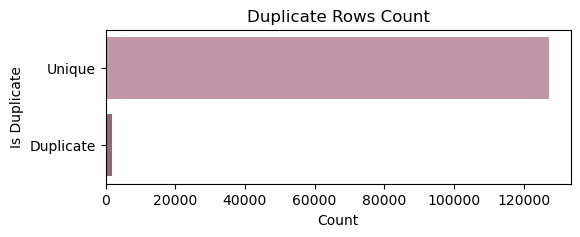

In [228]:
plt.figure(figsize=(6,2))
sns.countplot(data=df, y='is_duplicated',
              palette=['#C890A7', '#A35C7A'], orient='h')
plt.title('Duplicate Rows Count')
plt.ylabel('Is Duplicate')
plt.xlabel('Count')
plt.yticks(ticks=[0, 1], labels=['Unique', 'Duplicate'])
plt.show()

In [229]:
# Remove duplicated records and reset dataset
df = df.drop_duplicates(keep='first')

## Reset the index (optional)
df.reset_index(drop=True, inplace=True)

## Show my_data
display(df.head())

## Determine the duplicated values again:
print(f'\n The number duplicated values')
display(df.duplicated().sum())
## Retest duplicated values
if 'is_duplicated' in df.columns:
    df.drop(columns=['is_duplicated'], inplace=True)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,is_duplicated
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,False
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,False



 The number duplicated values


0

### Handling missing values

In [230]:
missing_value = pd.DataFrame(round(df.isnull().sum() * 100 / df.shape[0], 2)).reset_index()


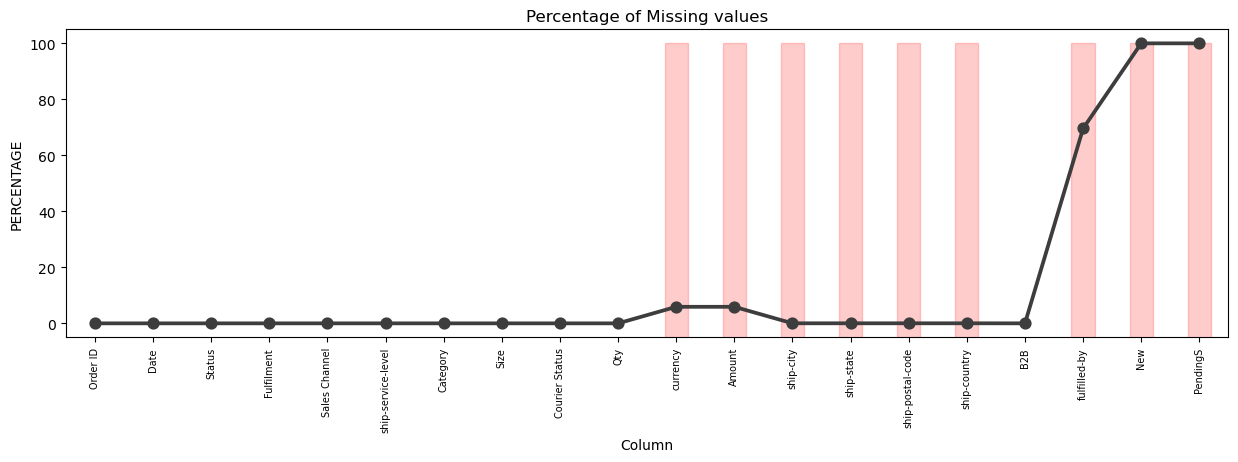

In [231]:
missing_value.columns = ['Column', 'Missing Percentage']  # Rename columns

# Plotting
plt.figure(figsize=(15,4))
sns.pointplot(x='Column', y='Missing Percentage', data=missing_value, color= '#3D3D3D')

# Highlight columns with missing values (assuming columns with > 0% missing data)
highlight_columns = missing_value[missing_value['Missing Percentage'] > 0]['Column']

# Get the current axes and draw red boxes around the columns with missing values
ax = plt.gca()
for i, col in enumerate(missing_value['Column']):
    if col in highlight_columns.values:
        ax.add_patch(plt.Rectangle((i-0.2, -10), 0.4, 110, color='red', alpha=0.2))

# Setting
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [232]:
if all(col in df.columns for col in ['fulfilled-by', 'New', 'PendingS']):
    df.drop(columns=['fulfilled-by', 'New', 'PendingS'], inplace=True)

In [233]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128017 entries, 0 to 128016
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Status              128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  int64         
 10  currency            120454 non-null  object        
 11  Amount              120454 non-null  float64       
 12  ship-city           127985 non-null  object        
 13  ship-state          127985 no

In [235]:
df.currency.value_counts()

currency
INR    120454
Name: count, dtype: int64

In [236]:
df.currency.fillna('INR', inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128017 entries, 0 to 128016
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Status              128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  int64         
 10  currency            128017 non-null  object        
 11  Amount              120454 non-null  float64       
 12  ship-city           127985 non-null  object        
 13  ship-state          127985 no

In [237]:
df.Amount.fillna(0, inplace= True)

<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">Outlier Treatment</span></h2>

### Detect Outlier

In [238]:
def detect_outlier_zscore(df, col, thres= 3):
    mean= col.mean()
    std= col.std()
    
    z_scores = (col - mean) / std
    
    # Identified lower outliers (Z-score < -threshold)
    lower_outliers = df[z_scores < -thres].shape[0]
    print("Number of lower outliers:", lower_outliers)

    # Identified upper outliers (Z-score > threshold)
    upper_outliers = df[z_scores > thres].shape[0]
    print("Number of upper outliers:", upper_outliers)

    # Concate two outlier groups
    outliers_per = round((lower_outliers + upper_outliers)*100/df.shape[0],3)
    print(f"Percentage of ouliers: {outliers_per} %")
    
    outliers_df = df[abs(z_scores) > thres]
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df.index, y=z_scores, color='blue', label="Normal Data")
    sns.scatterplot(x=outliers_df.index, y=z_scores[outliers_df.index], color='red', label="Outliers")
    plt.axhline(y=thres, color='r', linestyle='--', label=f"Upper Threshold (+{thres})")
    plt.axhline(y=-thres, color='r', linestyle='--', label=f"Lower Threshold (-{thres})")
    plt.xlabel("Index")
    plt.ylabel("Z-score")
    plt.title(f"Outliers Detection using Z-score \n{col.head()}")
    plt.legend()
    plt.show()



Number of lower outliers: 0
Number of upper outliers: 436
Percentage of ouliers: 0.341 %


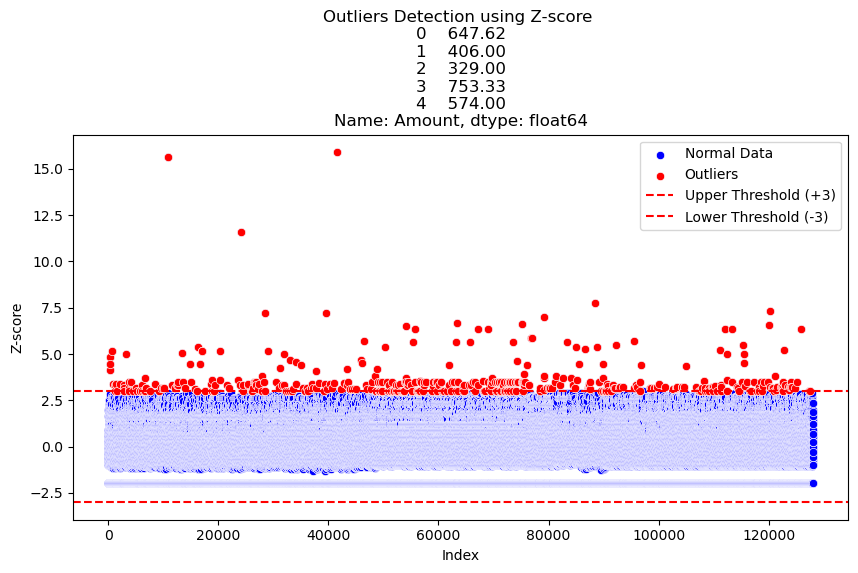

In [239]:
detect_outlier_zscore(df, df.Amount)

In [240]:
# Detect Outlier by IQR:
def detect_outlier_iqr (df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].boxplot(col)
    ax[0].set_title(f'Boxplot')

    sns.kdeplot(col, shade=True, ax=ax[1])
    ax[1].set_title(f'KDE plot')
    
    plt.show()
    
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    n_O_upper = df[col > (Q3 + 1.5*scipy.stats.iqr(col))].shape[0]
    print("Number of upper outliers:", n_O_upper)
    n_O_lower = df[col < (Q1 - 1.5*scipy.stats.iqr(col))].shape[0]
    print("Number of lower outliers:", n_O_lower)
    # Percentage of ouliers
    outliers_per = round((n_O_lower + n_O_upper)*100/df.shape[0],3)
    print(f"Percentage of ouliers: {outliers_per} %")

    # Skewness
    skew_value = round(stats.skew(col),3)
    
    # Kurtosis
    kurtosis_value = round(stats.kurtosis(col, fisher=True),3)
    
    print(f"Skewness: {skew_value}")
    print(f"Kurtosis: {kurtosis_value}")
    return Q1, Q3, n_O_upper, n_O_lower, outliers_per 
    

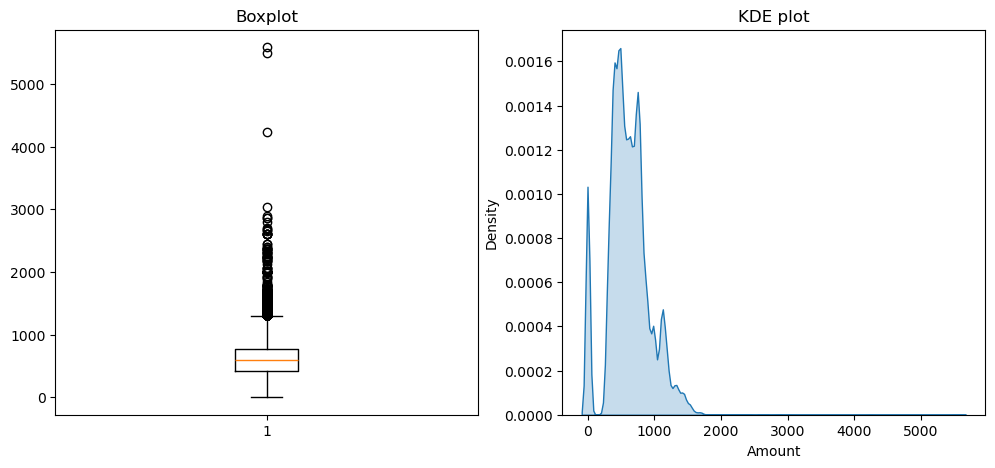

Number of upper outliers: 3170
Number of lower outliers: 0
Percentage of ouliers: 2.476 %
Skewness: 0.448
Kurtosis: 1.918


(416.0, 771.0, 3170, 0, 2.476)

In [241]:
detect_outlier_iqr(df, df.Amount)

<b>Overall:</b><br>

    - Using 'Z-score' makes it easy to see that the data points are divided into three groups, with density gradually decreasing at the upper outliers. This indicates the difficulty in assessing and handling outliers appropriately.
    - According to IQR, the effect is even more pronounced as it highlights the presence of many extreme values distributed on the KDE plot.
<b>Conclusion:</b> Continue analyzing the data with outliers. Because this is due to the inherent nature of the 'Amount' column data.

<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">Determine Insight Case</span></h2>

In [242]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


<span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">**Datetime Series**</span>

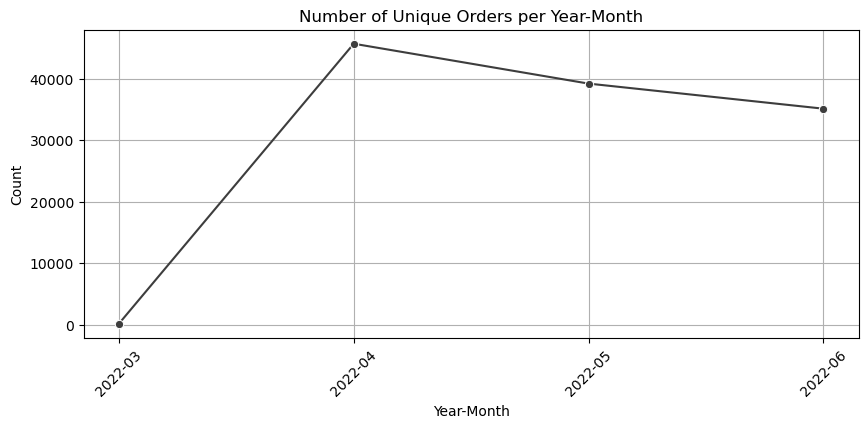

In [243]:
# Extract year_month from date
df['year_month'] = df['Date'].dt.to_period('M')

# Count the frequency of each year_month
year_month_counts = df.groupby('year_month')['Order ID'].nunique()

# Convert Period to string for better plotting
labels = year_month_counts.index.astype(str)

# Plot the line graph
plt.figure(figsize=(10,4))
sns.lineplot(x=labels, y=year_month_counts.values, marker='o', color= '#3D3D3D')

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("Number of Unique Orders per Year-Month")
plt.grid(True)

plt.show()

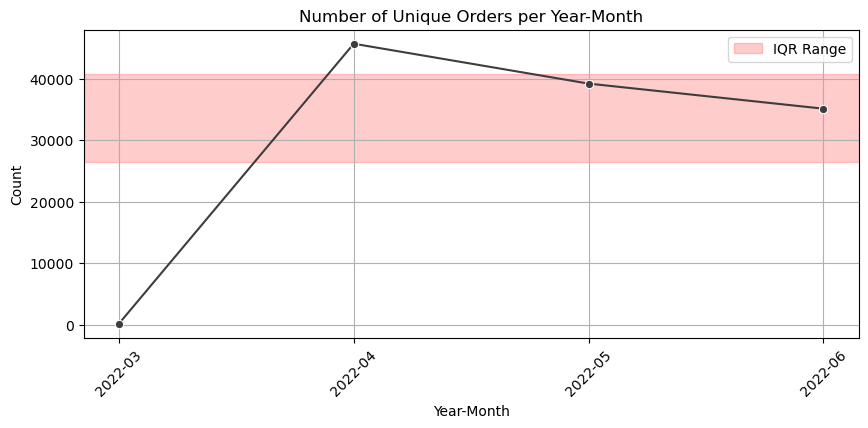

In [244]:
# Extract year_month from date
df['year_month'] = df['Date'].dt.to_period('M')

# Count the frequency of each year_month
year_month_counts = df.groupby('year_month')['Order ID'].nunique()

# Convert Period to string for better plotting
labels = year_month_counts.index.astype(str)

# Calculate IQR
Q1 = year_month_counts.quantile(0.25)
Q3 = year_month_counts.quantile(0.75)

# Define IQR range
iqr_min = Q1
iqr_max = Q3

# Plot the line graph
plt.figure(figsize=(10, 4))
sns.lineplot(x=labels, y=year_month_counts.values, marker='o', color='#3D3D3D')

# Highlight IQR region
plt.axhspan(iqr_min, iqr_max, color='red', alpha=0.2, label="IQR Range")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("Number of Unique Orders per Year-Month")
plt.legend()
plt.grid(True)

plt.show()


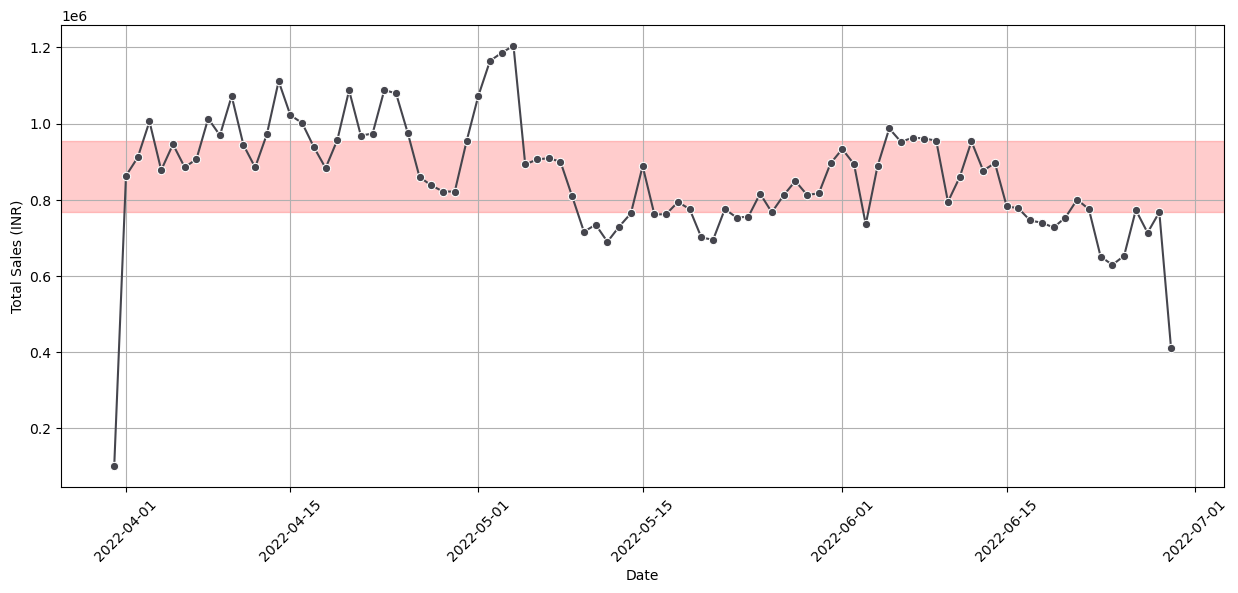

In [245]:
sales_by_date = df.groupby('Date')['Amount'].sum()
# Calculate IQR
Q1 = sales_by_date.quantile(0.25)
Q3 = sales_by_date.quantile(0.75)

# Define IQR range
iqr_min = Q1
iqr_max = Q3

plt.figure( figsize= (15,6))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, marker="o", color="#45454D")

# Highlight IQR region
plt.axhspan(iqr_min, iqr_max, color='red', alpha=0.2, label="IQR Range")
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">**Status Explore**</span>

In [246]:
status_counts= df.Status.value_counts()
pd.DataFrame({'Count': status_counts,
    'Percentage': round(status_counts* 100/ df.shape[0],3)
             })

,Count,Percentage
Status,,
Shipped,77407,60.466
Shipped - Delivered to Buyer,28515,22.274
Cancelled,18044,14.095
Shipped - Returned to Seller,1945,1.519
Shipped - Picked Up,970,0.758
Pending,656,0.512
Pending - Waiting for Pick Up,277,0.216
Shipped - Returning to Seller,144,0.112
Shipped - Out for Delivery,35,0.027


### 1. Completed Delivery Status Group (Total: 82.74%)
These statuses indicate orders that have been successfully delivered to the buyer:

- **Shipped (60.47%)**: Most orders fall under this status, possibly because the system only records when the order leaves the warehouse without updating subsequent statuses.
- **Shipped - Delivered to Buyer (22.27%)**: These are the orders that have actually reached the buyer.
- **Shipped - Picked Up (0.76%)**: The buyer picked up the order themselves.

⮕ Remarks:
- If the system only marks orders as "Shipped" but doesn't update to "Shipped - Delivered to Buyer," the order tracking process may need to be reviewed.
- The successful delivery rate is quite high (~82.74%), **but if only counting those that definitely reached the buyer (22.27%), this is an issue that needs attention.**

### 2. Cancelled Order Status Group (14.10%)
- **Cancelled (14.10%)**: The cancellation rate is **quite high**, which could be due to reasons such as out of stock, buyer changing their mind, or payment issues.

⮕ Remarks:
- If this rate remains high, the reasons for cancellations (whether customer-driven or system errors) should be examined to optimize the process.

### 3. Returned or Issue Encountered Order Status Group (1.67%)
These statuses indicate problems during delivery:

- **Shipped - Returned to Seller (1.52%)**: The goods were returned due to shipping errors or the buyer not accepting them.
- **Shipped - Returning to Seller (0.11%)**: The order is on its way back to the seller.
- **Shipped - Rejected by Buyer (0.01%)**: The buyer rejected the order.
- **Shipped - Lost in Transit (0.003%)**: The item was lost during shipping.
- **Shipped - Damaged (0.0008%)**: The item was damaged during shipping.

⮕ Remarks:
- The return rate (1.67%) is not very high, but the causes (defective products, incorrect descriptions, buyer changing their mind, etc.) should be analyzed.
- If the "Shipped - Rejected by Buyer" or "Shipped - Lost in Transit" rates increase, the shipping service provider should be checked.

### 4. Pending Order Status Group (0.76%)
- **Pending (0.51%)**: The order is yet to be processed.
- **Pending - Waiting for Pick Up (0.22%)**: Waiting for the shipper to pick up the goods.
- **Shipping (0.006%)**: The order is currently being shipped.
- **Shipped - Out for Delivery (0.03%)**: The order is on its way to the customer.

⮕ Remarks:
- The low pending rate indicates that the system is operating efficiently.
- However, it is important to investigate why 0.51% of orders remain in the Pending status, especially if they have been stuck for a prolonged period.


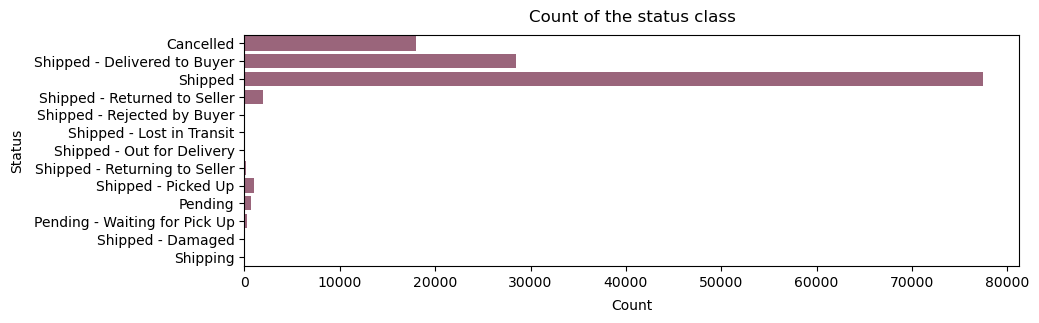

In [247]:
plt.figure(figsize=(10, 3))
sns.countplot(y='Status', data=df, orient='h', color='#A35C7A')


plt.xlabel("Count", labelpad=7)
plt.ylabel("Status", labelpad=7)
plt.yticks(fontsize= 10)
plt.title("Count of the status class", y=1.02)

plt.show()

### Classifying them into 5 group after discussing above

In [248]:
# Assume df is your DataFrame with the 'Status' column
conditions = [
    # "Delivered" statuses: Shipped and Delivered to Buyer, Out for Delivery
    df['Status'].str.contains('Shipped - Delivered to Buyer|Shipped - Out for Delivery', case=False, na=False),
    
    # "Shipped" statuses: Other shipped states like Shipped or Picked Up
    df['Status'].str.contains('Shipped|Shipped - Picked Up', case=False, na=False),
    
    # "Pending" statuses: Includes Pending and Waiting for Pick Up
    df['Status'].str.contains('Pending|Pending - Waiting for Pick Up', case=False, na=False),
    
    # "Cancelled/Problematic" statuses: Includes Cancelled, Rejected by Buyer, Damaged
    df['Status'].str.contains('Cancelled|Shipped - Rejected by Buyer|Shipped - Damaged', case=False, na=False),
    
    # "Return/Lost" statuses: Includes Returned to Seller or Lost in Transit
    df['Status'].str.contains('Shipped - Returned to Seller|Shipped - Lost in Transit', case=False, na=False),
    
    # "Other" statuses: Shipping
    df['Status'].str.contains('Shipping', case=False, na=False)
]

# The categories that correspond to the above conditions
choices = ['Delivered', 'Shipped', 'Pending', 'Cancelled/Problematic', 'Return/Lost', 'Other']

# Apply the conditions and assign the appropriate category to the new 'Status_Category' column
df['status_category'] = np.select(conditions, choices, default='Other')

# Display the DataFrame with the new 'status_category' column
df.status_category.value_counts()


status_category
Shipped                  80482
Delivered                28550
Cancelled/Problematic    18044
Pending                    933
Other                        8
Name: count, dtype: int64

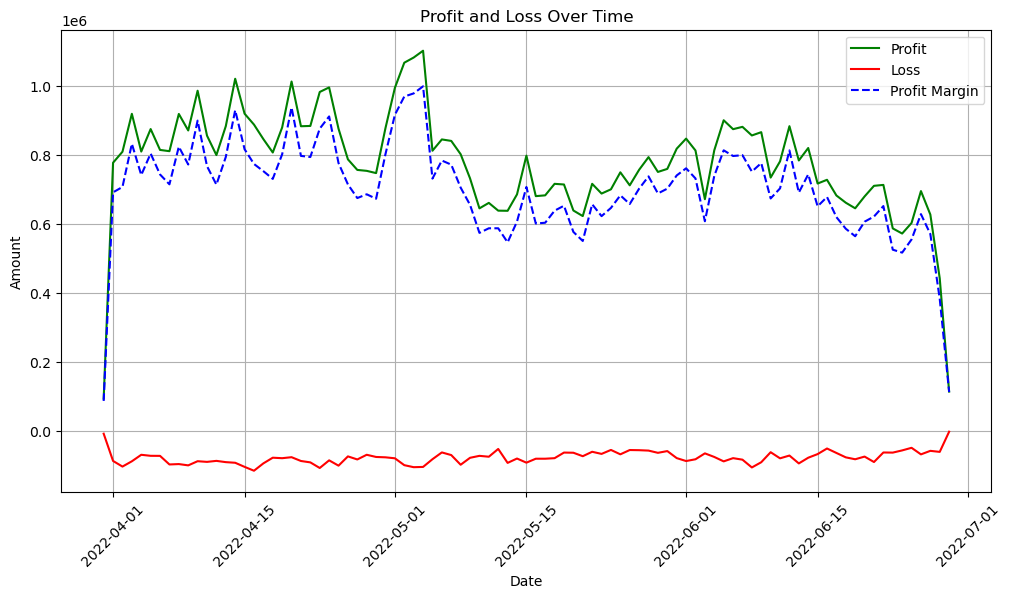

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Profit and Loss columns
df['Profit'] = df['Amount'].where(df['status_category'].isin(['Shipped', 'Delivered']), 0)
df['Loss'] = np.where(df['status_category'] == 'Cancelled/Problematic', -df['Amount'], 0)

# Aggregate Profit and Loss by Date
daily_summary = df.groupby('Date')[['Profit', 'Loss']].sum()

# Compute Profit Margin
daily_summary['Profit Margin'] = daily_summary['Profit'] + daily_summary['Loss']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_summary.index, daily_summary['Profit'], label="Profit", color='green')
plt.plot(daily_summary.index, daily_summary['Loss'], label="Loss", color='red')
plt.plot(daily_summary.index, daily_summary['Profit Margin'], label="Profit Margin", color='blue', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Profit and Loss Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h2><span style="background: linear-gradient(to right, #FFEDFA, #F7CFD8); padding: 2px 5px;border-radius: 10px">Analyzing Dataset</span></h2>

### Univariate Analysis

['Status',
 'Fulfilment',
 'Sales Channel',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'status_category']

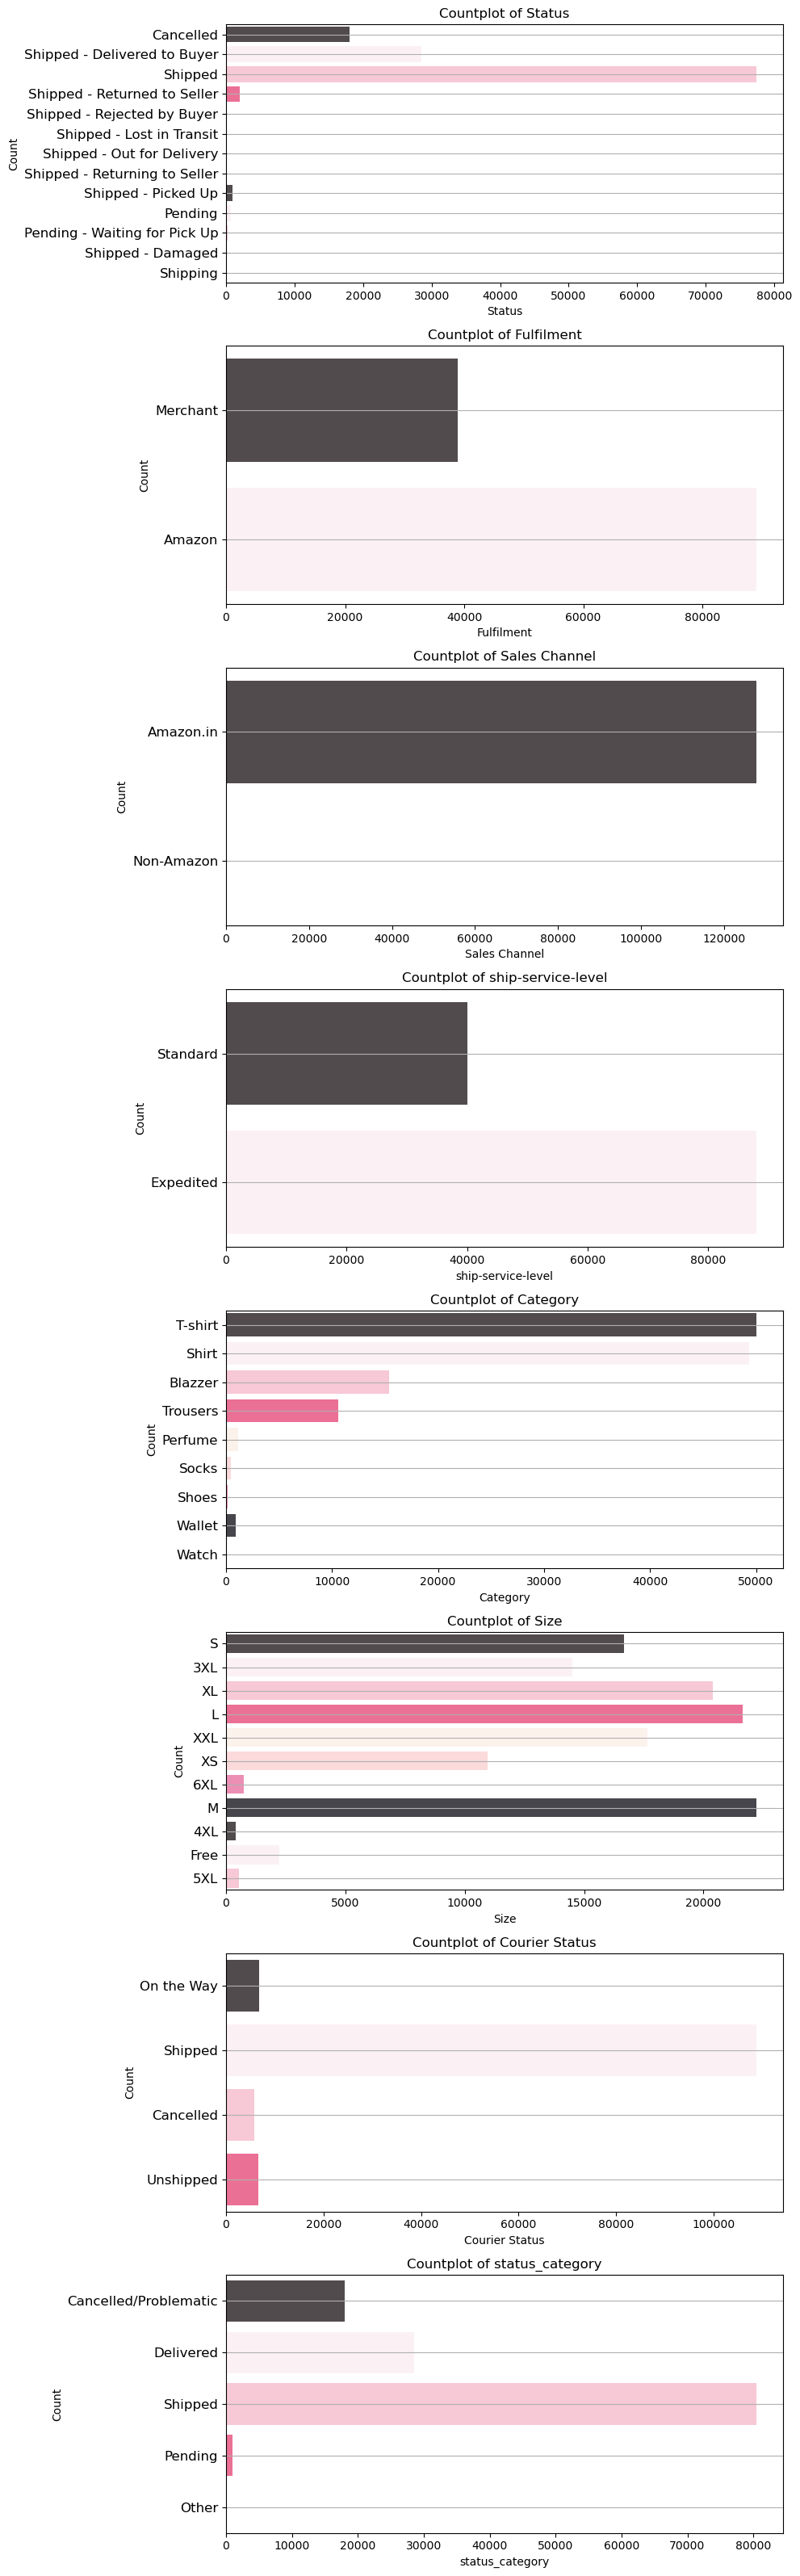

In [250]:
# Create the list with unique values < 10 
category_columns = [col for col in df.columns if df[col].dtype=='object' and df[col].nunique() < 20 and df[col].nunique() > 1]

color = ['#524A4E', '#FDEFF4', '#FFC0D3', '#FF5C8D', '#FFF1E9', '#FFD5D5', '#FC7FB2', '#45454D']

# Countplot each columns in built list
display(category_columns)
# Điều chỉnh kích thước dựa trên số lượng cột
plt.figure(figsize=(10, len(category_columns) * 4))  ## Setting the scale up for plotting

for i, col in enumerate(category_columns, 1):
    plt.subplot(len(category_columns), 1, i)
    sns.countplot(data=df, y=col, palette=color, orient='h')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.yticks(fontsize= 12)
    plt.title(f"Countplot of {col}")
    plt.grid(axis="y")
    
plt.tight_layout()
plt.show()


- <b>The number of orders delivered</b> directly to customers is quite large, but it is only approximately 1/3 of the total on Amazon.<br>

- <b>Orders placed on Amazon</b> are efficient.<br>

- Most orders are related to expedited shipping.<br>

- <b>T-shirts and shirts</b> are the most ordered products, while some fashion items are ordered less, though still in considerable quantity.<br>

- Larger sizes are selected less often than smaller sizes.<br>

- Most orders are fully shipped.<br>

- Customers <b>tend to order just one product at a time.</b><br>

- <b>The business model</b> has a bias toward B2C (Business to Consumer).<br>


In [251]:
df_dummies = pd.get_dummies(df[category_columns])

In [252]:
df_combined = pd.concat([df_dummies, df['Amount']], axis=1)

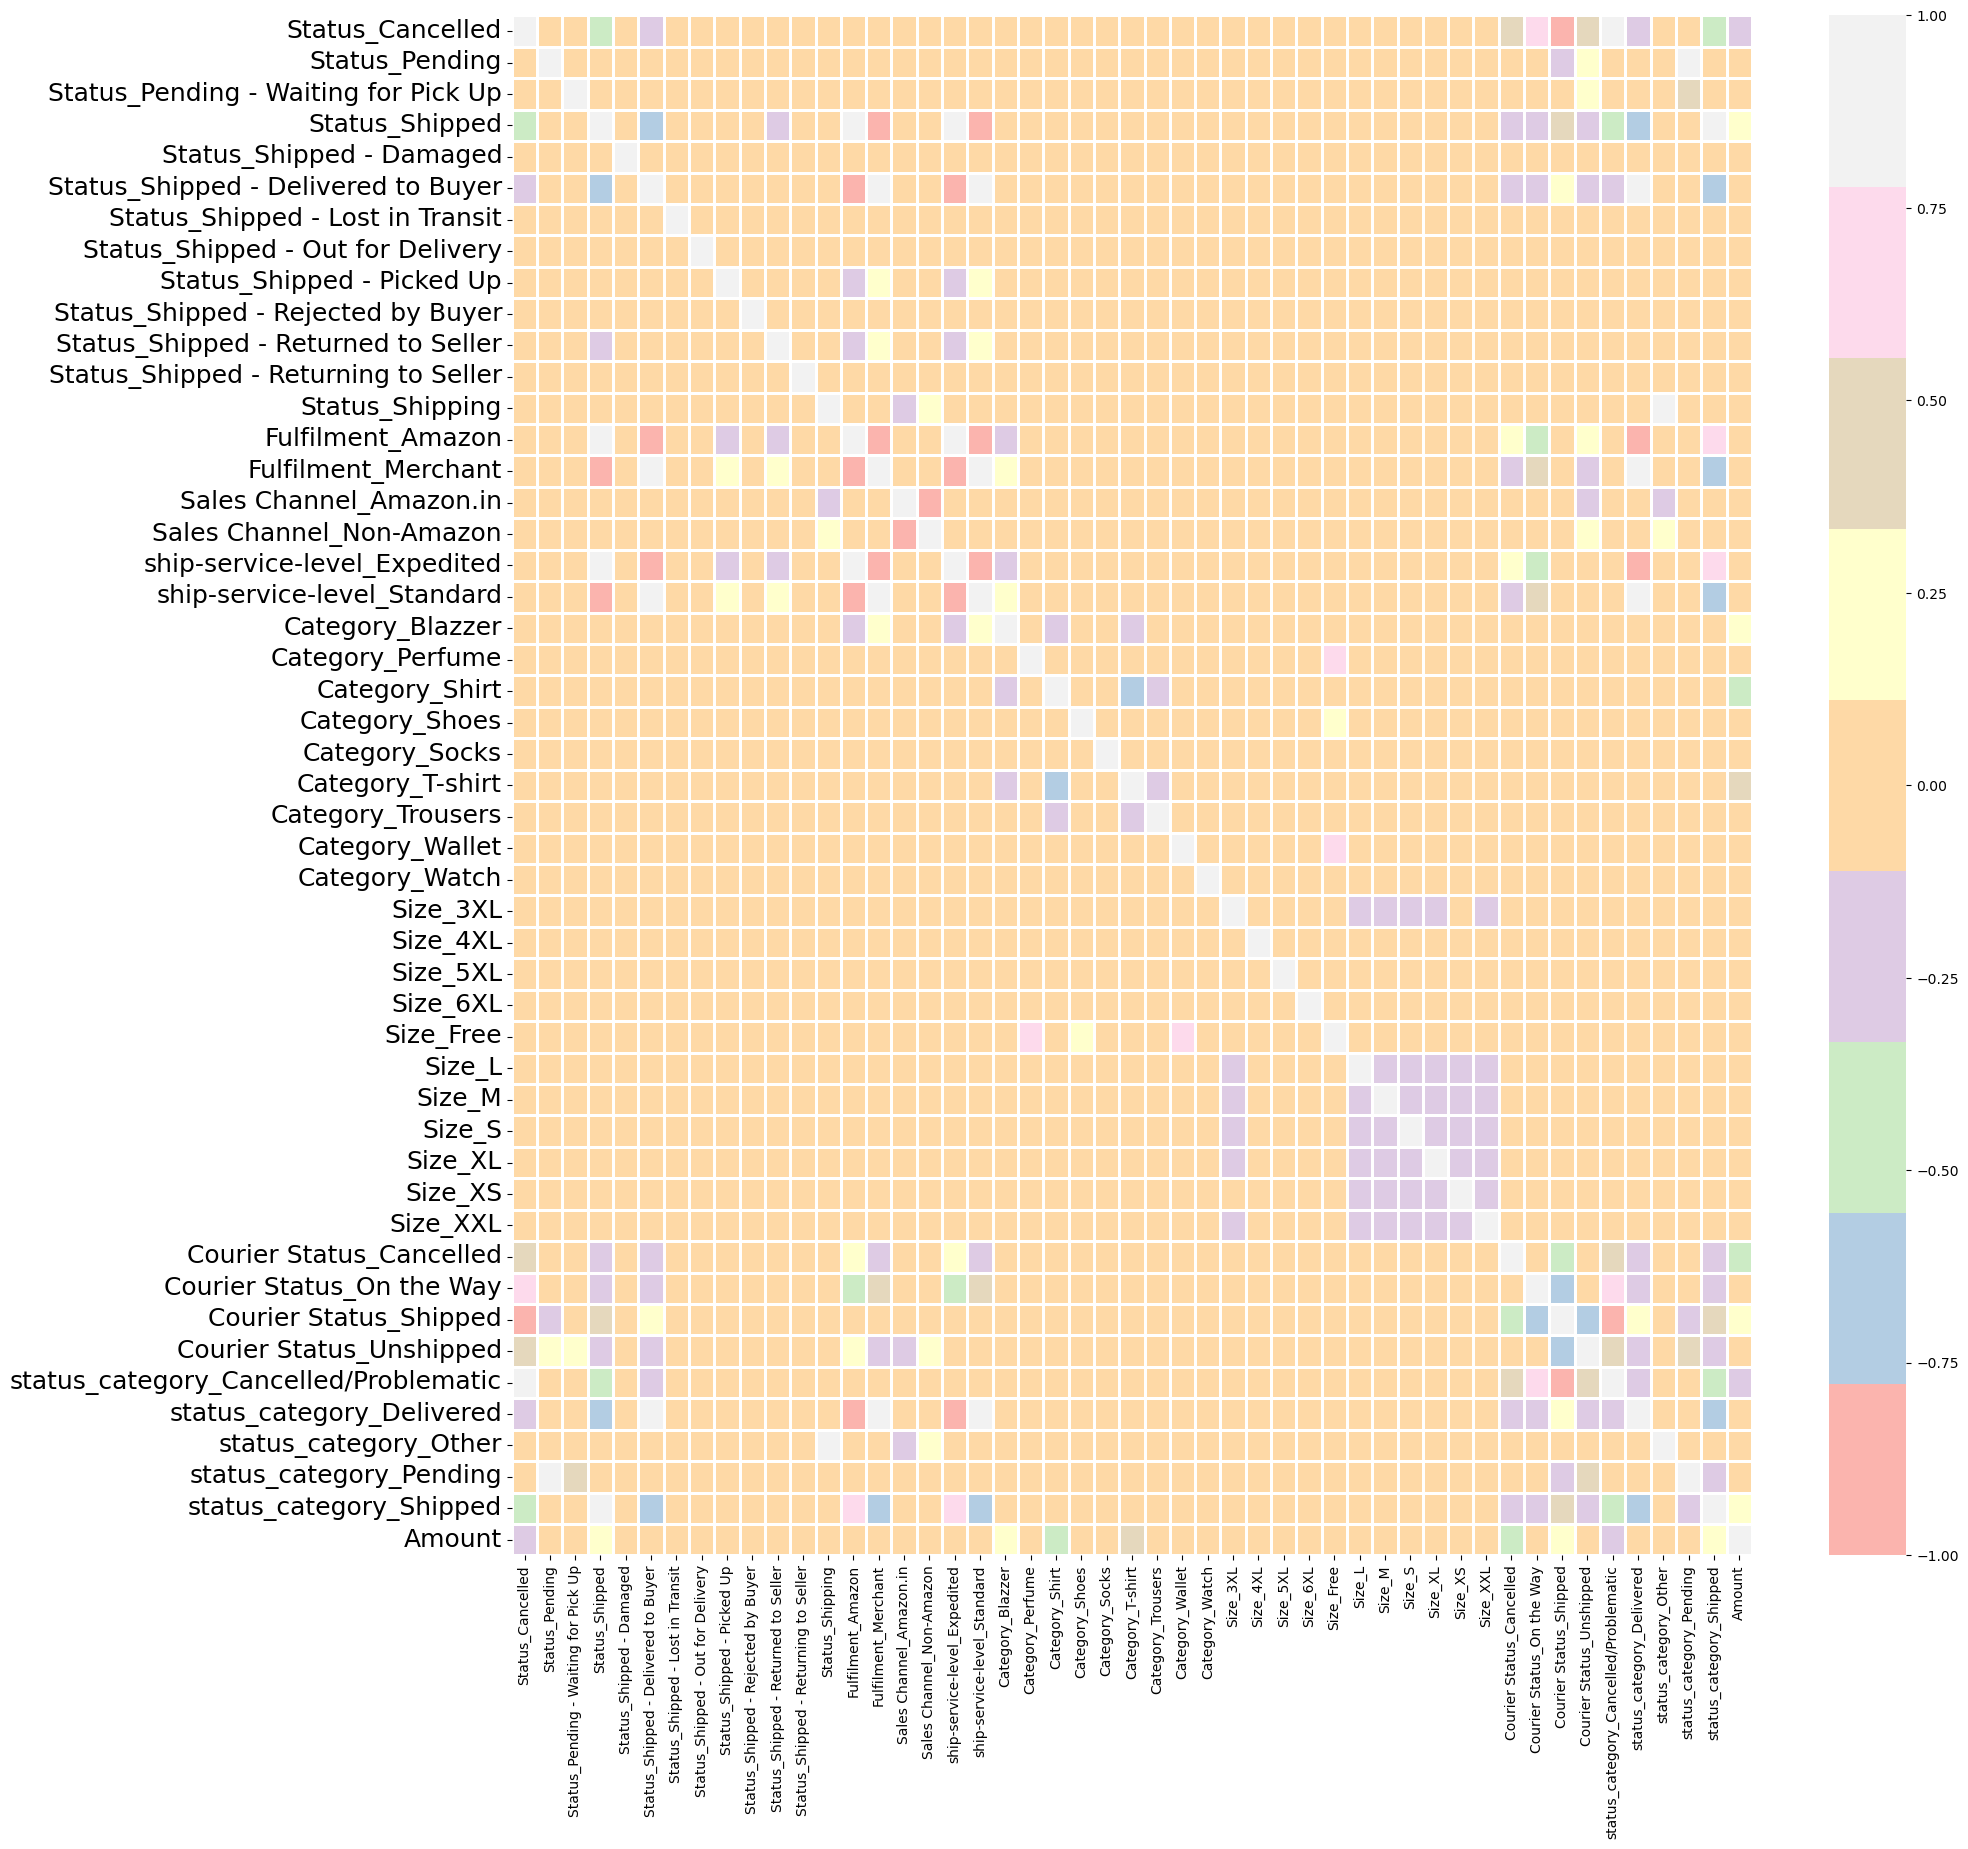

In [253]:

plt.figure(figsize=(20,20))
sns.heatmap(df_combined.corr(), cmap='Pastel1', linewidths=1)
plt.yticks(fontsize=18)
plt.show()

In [254]:
# Calculating the corrleration matrix
corr_matrix = df_dummies.corr()

# Filter all result greater then or equal to 0.75 and less than 1
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = upper_corr_matrix[(corr_matrix > 0.75) & (corr_matrix < 1)]

# Converting corr matrix into cols
high_corr_clean = high_corr.stack().reset_index()
high_corr_clean.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display results
high_corr_clean= high_corr_clean.sort_values('Correlation').reset_index(drop=True)
pd.DataFrame(high_corr_clean)

,Feature 1,Feature 2,Correlation
0,Fulfilment_Amazon,status_category_Shipped,0.752120
1,Status_Shipped - Delivered to Buyer,ship-service-level_Standard,0.793896
2,ship-service-level_Standard,status_category_Delivered,0.794523
3,Status_Shipped,ship-service-level_Expedited,0.798635
4,Status_Shipped - Delivered to Buyer,Fulfilment_Merchant,0.809785
5,Fulfilment_Merchant,status_category_Delivered,0.810424
6,Status_Shipped,Fulfilment_Amazon,0.817566
7,Status_Pending,status_category_Pending,0.837603
8,Status_Shipped,status_category_Shipped,0.950450
9,Fulfilment_Amazon,ship-service-level_Expedited,0.980379


### Bivariate Analysis
- Analyzing between Cat & Num **key features**
    - Realtionship between **Category** and **Amount**
    - Realtionship between **ship-state** and **Amount**
- Analyzing between Cat & Cat **key features**

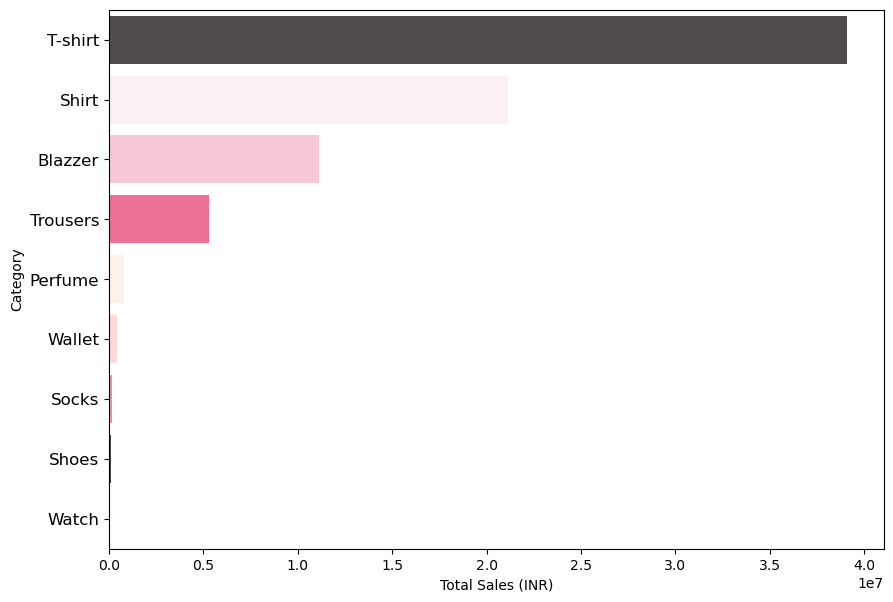

In [255]:
plt.figure(figsize=(10,7))
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette=color)
plt.xlabel('Total Sales (INR)')
plt.ylabel('Category')
plt.yticks(fontsize=12)
plt.show()


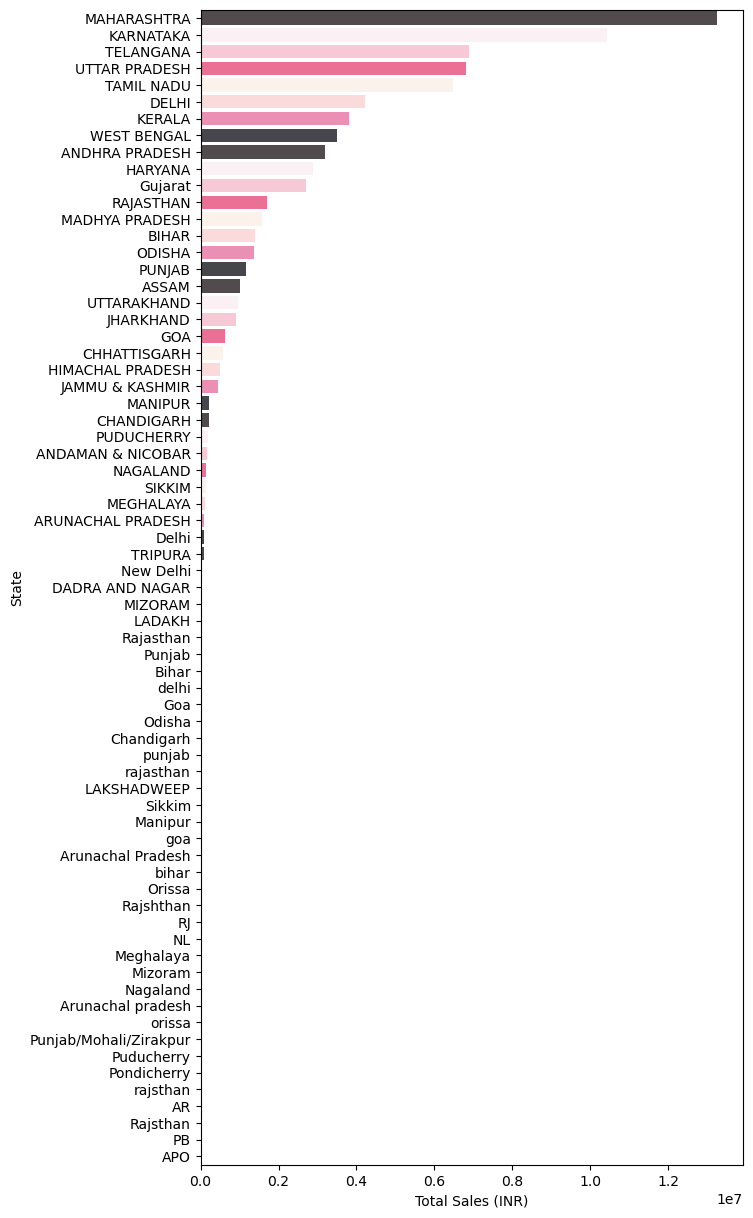

In [256]:
plt.figure(figsize=(7,15))
sales_by_state = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette=color)
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.yticks(fontsize=10)
plt.show()

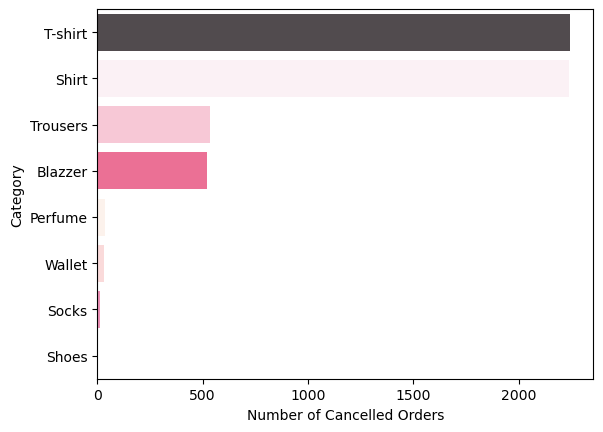

In [257]:
cancelled_orders = df[df['Status'].str.contains('Cancelled')]
cancelled_by_category = cancelled_orders.groupby('Category')['Qty'].sum().sort_values(ascending=False)
sns.barplot(x=cancelled_by_category.values, y=cancelled_by_category.index, palette=color)
plt.xlabel('Number of Cancelled Orders')
plt.ylabel('Category')
plt.show()

#### **Build uniplot function to plot bivariate analysis**

In [258]:
def uniplot(df, col, title, hue=None, color=color, ax=None):
    plt.figure(figsize=(10, 4))  # Thiết lập kích thước đồ thị

    # Setting scale
    plt.xticks(rotation=45, fontsize=10)  # Xoay trục x và điều chỉnh font size
    plt.yticks(fontsize=8)  # Điều chỉnh font size cho trục y
    plt.title(title, fontsize=12)

    # Vẽ countplot
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=hue, orient='h', palette=color, ax=ax)

    # Hiển thị đồ thị
    plt.show()


#### **Plot bivariate analysis**

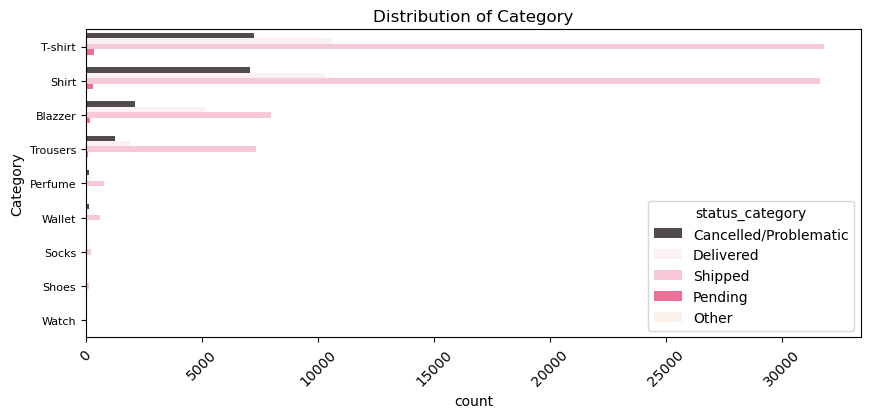

In [259]:
uniplot(df=df, col= 'Category', title= 'Distribution of Category', hue= 'status_category')

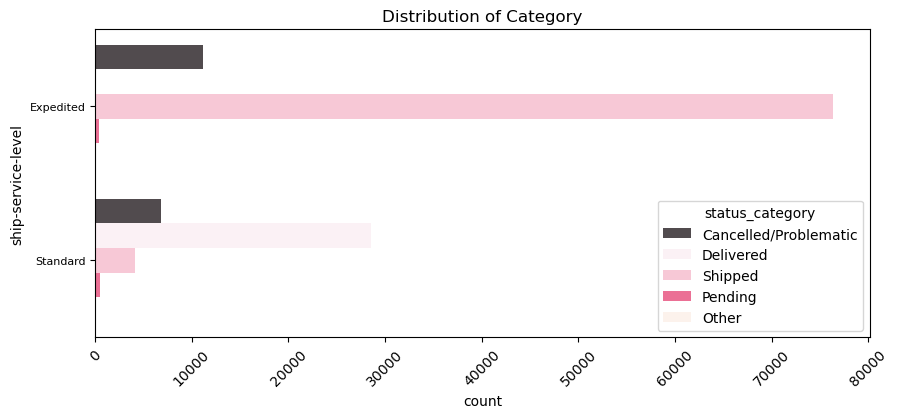

In [260]:

uniplot(df=df, col='ship-service-level', title='Distribution of Category', hue='status_category')
